In [116]:
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io as io
import numpy as np
import pandas as pd
import matplotlib

from hydrophone_data_processing import load
from obspy.signal.tf_misfit import cwt
import obspy

In [117]:
paths = ['/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.01.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.02.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.03.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.04.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.05.GDH.2019.138'
        ,'/media/sda/data/robdata/Hydrophones/DAYS/B00/B00.7F.06.GDH.2019.138']

day138 = load.import_corrected_data_for_single_day(paths=paths)

In [118]:
bubbles = pd.read_csv('allbubblesh1.csv', names=np.arange(2114))


In [82]:
bubble_waveform = day138.slice(starttime=obspy.UTCDateTime('2019-05-18T21:23:38')
           ,endtime=obspy.UTCDateTime('2019-05-18T21:23:45'))

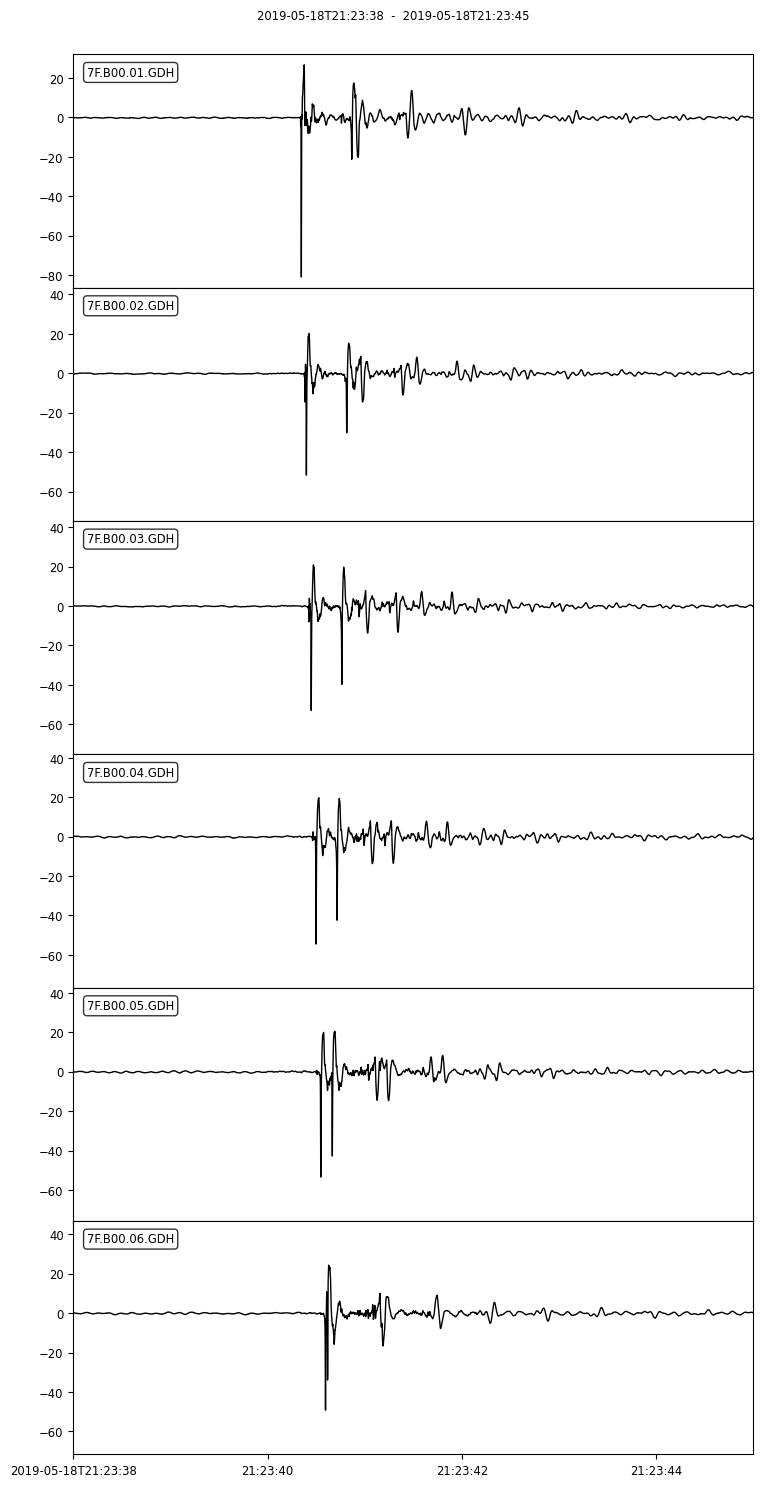

In [83]:
x = day138.plot(starttime=obspy.UTCDateTime('2019-05-18T21:23:38')
           ,endtime=obspy.UTCDateTime('2019-05-18T21:23:45'))

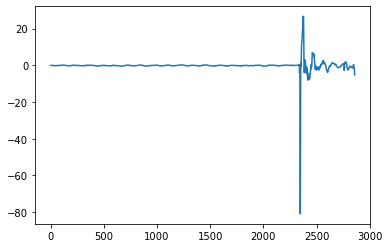

In [101]:
plt.plot(bw_h1.data[:2860])

/tmp/ipykernel_5083/1009277004.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


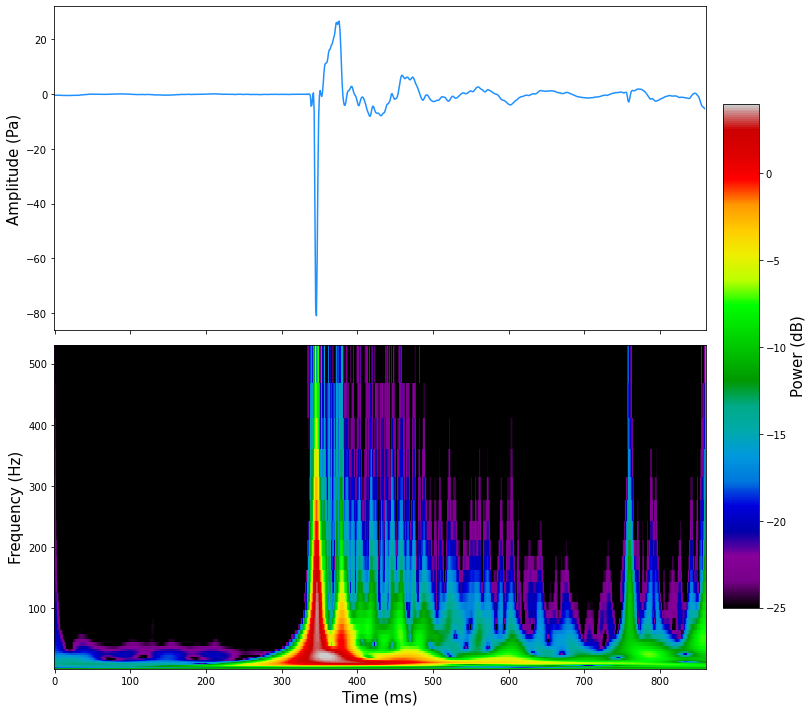

In [115]:
f_min=0.001
f_max=500
dt = day138[0].stats.delta

bw_h1 = bubble_waveform[0]

# npts = bubbles[230].shape[0]
# npts = bw_h1.data.shape[0]
# tr = bubbles[230].values
tr = bw_h1.data[2000:2860]
npts = tr.shape[0]

t = np.linspace(0, dt * npts, npts)
scalogram = cwt(tr, dt, 3, f_min, f_max)

x, y = np.meshgrid(t, np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))

fig, (ax, ax2) = plt.subplots(2, 1, figsize=(10, 10), sharex=True)

# bubbles[230].plot(ax=ax)
ax.plot(tr, color='dodgerblue')
ax.set_ylabel('Amplitude (Pa)', fontsize=15)

# cbar = ax2.pcolormesh(x*1000, y, 10*np.log10(np.abs(scalogram)), cmap='nipy_spectral', shading='auto', vmax=-4.8, vmin=-25)
cbar = ax2.pcolormesh(x*1000, y, 10*np.log10(np.abs(scalogram)), cmap='nipy_spectral', shading='auto', vmax=4, vmin=-25)

cbar_ax = fig.add_axes([1.0085, 0.15, 0.05, 0.7])
c = fig.colorbar(cbar, cax=cbar_ax)

c.ax.set_ylabel('Power (dB)', fontsize=15)


ax2.set_ylabel('Frequency (Hz)', fontsize=15)
ax2.set_xlabel('Time (ms)', fontsize=15)
# ax2.set_yscale('log')

fig.tight_layout()
fig.savefig('figures/supp.pdf', bbox_inches='tight', dpi=300)

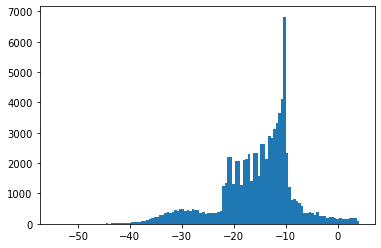

In [110]:
z = plt.hist((10*np.log10(np.abs(scalogram))).flatten(), bins=40*3)

In [113]:
10*np.log10(np.abs(scalogram)).flatten().max()

4.1093007840755442